# Modeling

This notebook is the final installment in this capstone project.

Here are the links to the other notebooks:

Data Wrangle https://github.com/gisthuband/Capstone_3_Mental_Health_Score_Predictor/blob/main/data_wrangle/data_wrangle.ipynb

Exploratory Data Analysis https://github.com/gisthuband/Capstone_3_Mental_Health_Score_Predictor/blob/main/exploratory_data_analysis/exploratory_data_analysis.ipynb

Preprocessing https://github.com/gisthuband/Capstone_3_Mental_Health_Score_Predictor/blob/main/preprocessing/preprocessing.ipynb

This project will be used to predict the mental health scores of individuals based on race/ethnicity, the unemployment rate change, and the unemployment change.

Inputs: Race/Ethnicity, unemployment rate change, unemployment change

Outputs: Mental Health Score

In this notebook I will run through several regression models:

1.) Linear Regression

2.) Ridge regression

3.) Lasso Regression

4.) Random Forest Regression

5.) K Nearest Neighbors

6.) Gradient Boosting

7.) Linear Support Vector Regression

8.) Deep Neural Network

Use R Squared and RMSE as the metrics for the models

## Imports

In [1]:
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import metrics
import tensorflow as tf
import tensorflow.keras as keras
import statsmodels.api as sm 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

## Preprocessing Class

In [2]:
class preprocess:
    def __init__(self, df_path):
        self.df_path = df_path
    
    #1
    def numeric_only(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')

        df = df.drop(columns=['Date','Year','Indicator','Subgroup'])
        
        features = list(df.columns[df.columns != 'Value'])

        X = df[features]
        
        y = df['Value']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
        
        return X_train, X_test, y_train, y_test
    
    
    #2
    def numeric_with_constant(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')

        df = df.drop(columns=['Date','Year','Indicator','Subgroup'])
        
        features = list(df.columns[df.columns != 'Value'])

        X = df[features]
        X = sm.add_constant(X)
        
        y = df['Value']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
        
        return X_train, X_test, y_train, y_test
    
    #3
    def numeric_standardized(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')

        df = df.drop(columns=['Date','Year','Indicator','Subgroup'])
        
        features = list(df.columns[df.columns != 'Value'])

        X = df[features]
        
        y = df['Value']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=13)
        
        s_scaler = preprocessing.StandardScaler().fit(X_train)
        
        X_train=s_scaler.transform(X_train)
        
        X_test=s_scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
    
    #4
    def dummied(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')
        
        df = df.drop(columns=['Date','Year'])
        
        dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        
        
        dummed_df = pd.concat([df, dum_df],axis=1)

        dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])
        
        features = list(dummed_df.columns[dummed_df.columns != 'Value'])
        
        X = dummed_df[features]

        y = dummed_df['Value']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        
        return X_train, X_test, y_train, y_test
    #5
    def dummied_with_constant(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')
        
        df = df.drop(columns=['Date','Year'])
        
        dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        
        
        dummed_df = pd.concat([df, dum_df],axis=1)

        dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])
        
        features = list(dummed_df.columns[dummed_df.columns != 'Value'])
        
        X = dummed_df[features]
        X = sm.add_constant(X)

        y = dummed_df['Value']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        
        return X_train, X_test, y_train, y_test
    
    #6
    def dummied_standardized(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')
        
        df = df.drop(columns=['Date','Year'])
        
        dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        
        
        dummed_df = pd.concat([df, dum_df],axis=1)

        dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])
        
        features = list(dummed_df.columns[dummed_df.columns != 'Value'])
        
        X = dummed_df[features]

        y = dummed_df['Value']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
        
        s_scaler = preprocessing.StandardScaler().fit(X_train)
        
        X_train=s_scaler.transform(X_train)
        
        X_test=s_scaler.transform(X_test)
        
        return X_train, X_test, y_train, y_test
        
    
    #7
    def random_label_numeric_only(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')

        df = df.drop(columns=['Date','Year','Indicator','Subgroup'])
        
        rng = np.random.default_rng()
        
        rand_scores = list(rng.integers(low=0, high=48, size=len(df))) 
        
        df['random_values'] = rand_scores
        
        df = df.drop(columns='Value')
        
        features = list(df.columns[df.columns != 'random_values'])

        X = df[features]
        
        y = df['random_values']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=6)
        
        return X_train, X_test, y_train, y_test
    
    #8
    def random_label_dum(df_path):
        
        df = pd.read_csv(df_path)

        df = df.drop(columns='Unnamed: 0')
        
        df = df.drop(columns=['Date','Year'])
        
        dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        
        
        dummed_df = pd.concat([df, dum_df],axis=1)

        dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])
        
        rng = np.random.default_rng()
        
        rand_scores = list(rng.integers(low=0, high=48, size=len(df))) 
        
        dummed_df['random_values'] = rand_scores
        
        dummed_df = dummed_df.drop(columns='Value')
        
        features = list(dummed_df.columns[dummed_df.columns != 'random_values'])

        X = dummed_df[features]
        
        y = dummed_df['random_values']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=9)
        
        return X_train, X_test, y_train, y_test

## Instantiate a list to contain the model results

In [3]:
models_keys = ['Ordinary_Least_Squares','Ridge','Lasso','Random_Forest','K_Neighbors','Gradient_Boosting','Support_Vector_Machine','Deep_Neural_Network']
models_values = []
best_model_results = {}

# 1.) Linear Regression (multivariable with OLS)

In [4]:
data = preprocess.numeric_with_constant('explored_data_v1.csv')
model = sm.OLS(data[2], data[0])
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     36.69
Date:                Mon, 29 Jul 2024   Prob (F-statistic):           1.09e-15
Time:                        21:19:48   Log-Likelihood:                -1812.0
No. Observations:                 556   AIC:                             3630.
Df Residuals:                     553   BIC:                             3643.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                29.4587      0.269    109.420      0.000      28.930      29.988
weighted_unemployment_rate_change     0.5762      0.088      6.568      0.000       0.404       0.748
total_unemployed_change           -6.789e-08   1.74e-07     -0.390      0.697    -4.1e-07    2.74e-07
==============================================================================
Omnibus:                        5.665   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.452
Skew:                           0.113   Prob(JB):                        0.108
Kurtosis:                       2.624   Cond. No.                     2.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
y_pred = results.predict(data[1])
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

OLS_results=[R2, rmse]

models_values.append(OLS_results)

print (R2, rmse)

0.07267146928491486 6.034206296231276


# 2.) Ridge Regression

In [6]:
data = preprocess.dummied_standardized('explored_data_v1.csv')
model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=6, scoring='r2').fit(data[0], data[2])
print (f'accuracy: {model.best_score_}, coefficients: {model.coef_ }')           

accuracy: 0.7211014266984724, coefficients: [ 2.19117195  0.04605484  0.04647083  2.01967718 -2.07468315  1.89079918
 -2.45485473  0.92692265 -0.4477215 ]


In [7]:
model.alpha_

1.0

In [8]:
model.score(data[1], data[3])

0.7618651097541416

In [9]:
y_pred =model.predict(data[1])

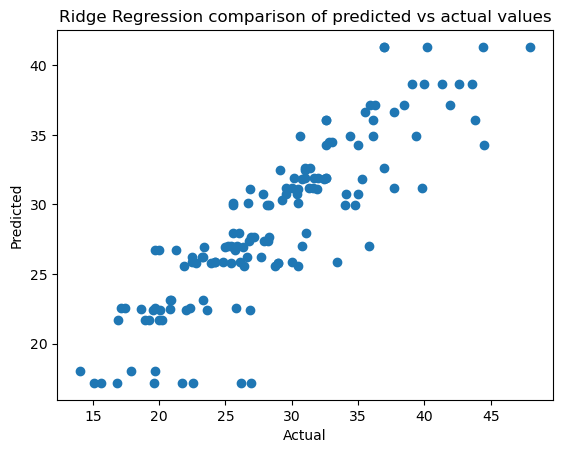

In [10]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Ridge Regression comparison of predicted vs actual values")
plt.show()

In [11]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

Ridge_results=[R2, rmse]

models_values.append(Ridge_results)

print (R2, rmse)

0.7618651097541416 3.4324338433345303


## Test bad randomized data with this technique

In [12]:
data = preprocess.random_label_dum('explored_data_v1.csv')
model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=6, scoring='r2').fit(data[0], data[2])
print (f'accuracy: {model.best_score_}, coefficients: {model.coef_ }')    

accuracy: -0.022271819449325214, coefficients: [-4.38562019e-02 -2.41232130e-07  1.94554554e-01 -1.35691381e+00
  1.16235925e+00 -2.63011485e-01  5.72498777e-01  1.20318176e+00
 -1.51266905e+00]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.02247e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.96781e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.86432e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.85708e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.

Evidence that there are actual patterns in the data and that the machine learning model is not just getting lucky

# 3.) Lasso Regression

In [13]:
data = preprocess.dummied_standardized('explored_data_v1.csv')
model = LassoCV(alphas=[.001, .01, .1, 1,10],max_iter = 1500, cv=5).fit(data[0],data[2])

In [14]:
model.score(data[1], data[3])

0.7292131359039776

In [15]:
model.alpha_

0.01

In [16]:
y_pred =model.predict(data[1])

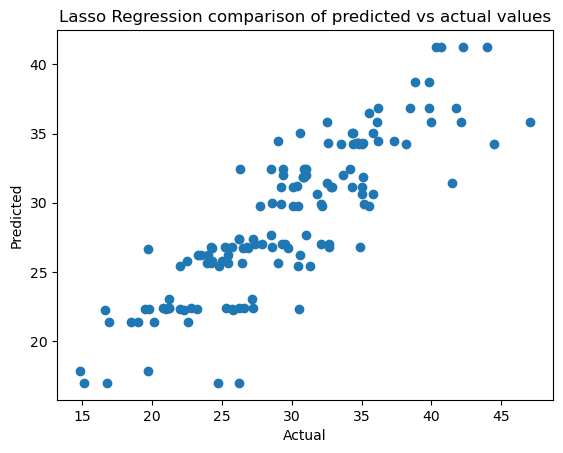

In [17]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Lasso Regression comparison of predicted vs actual values")
plt.show()

In [18]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

Lasso_results=[R2, rmse]

models_values.append(Lasso_results)

print (R2, rmse)

0.7292131359039775 3.4084677660601663


# 4.) Random Forest Regression

In [19]:
data = preprocess.dummied('explored_data_v1.csv')

grid_params = {'n_estimators':[50, 75, 100, 125, 150, 200], 'criterion':['friedman_mse','squared_error'] }

gscv_rfr = GridSearchCV(RandomForestRegressor(), param_grid=grid_params, cv=5, scoring='r2')

rfr = gscv_rfr.fit(data[0],data[2])

print (rfr.best_params_)
print (rfr.best_score_)

{'criterion': 'friedman_mse', 'n_estimators': 50}
0.7452344888283758


In [20]:
rfr.score(data[1],data[3])

0.7048639543370023

In [21]:
y_pred = rfr.predict(data[1])

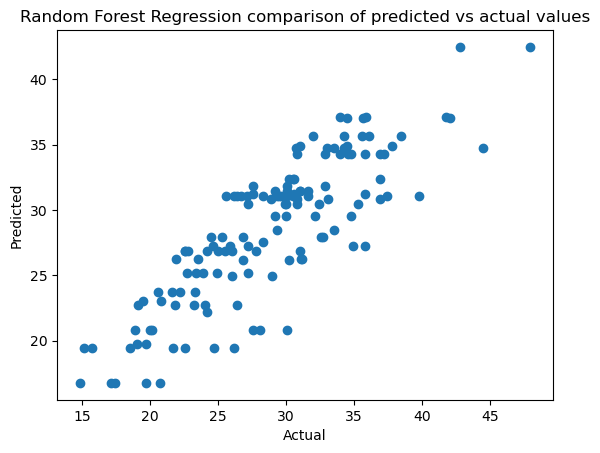

In [22]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Random Forest Regression comparison of predicted vs actual values")
plt.show()

In [23]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

Random_Forest_results=[R2, rmse]

models_values.append(Random_Forest_results)

print (R2, rmse)

0.7048639543370024 3.382501886699642


## Test with random labels

In [24]:
data = preprocess.random_label_dum('explored_data_v1.csv')
grid_params = {'n_estimators':[50, 75, 100, 125, 150, 200], 'criterion':['friedman_mse','squared_error'] }

gscv_rfr_random = GridSearchCV(RandomForestRegressor(), param_grid=grid_params, cv=5, scoring='r2')

rfr_random = gscv_rfr_random.fit(data[0],data[2])

print (rfr_random.best_params_)
print (rfr_random.best_score_)

{'criterion': 'squared_error', 'n_estimators': 125}
-0.07139116190060057


Another confirmation that there are actual patterns in the data, and the accuracy is not up to chance

# 5.) K Nearest Neighbor

In [25]:
data= preprocess.dummied('explored_data_v1.csv')
grid_params_k = {'n_neighbors':[3, 4, 5, 6, 7, 8 ,9, 10],'leaf_size': [20,40,1], 'weights':['uniform','distance'], 'p':[1,2] }

gscv_knr = GridSearchCV(KNeighborsRegressor(), param_grid=grid_params_k, cv=5, scoring='r2')

knr = gscv_knr.fit(data[0],data[2])

print (knr.best_params_)
print (knr.best_score_)

{'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.7149779018254941


In [26]:
knr.score(data[1],data[3])

0.7797718768339481

In [27]:
y_pred = knr.predict(data[1])

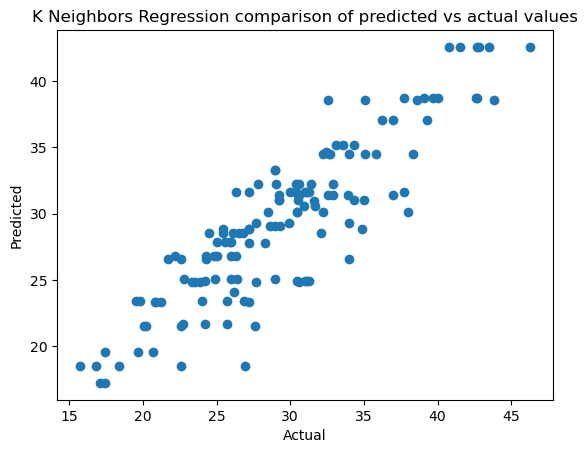

In [28]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("K Neighbors Regression comparison of predicted vs actual values")
plt.show()

In [29]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

K_Neighbors_results=[R2, rmse]

models_values.append(K_Neighbors_results)

print (R2, rmse)

0.779771876833948 2.986030647554204


# 6.) Gradient Boosting Regression

In [30]:
data = preprocess.dummied('explored_data_v1.csv')

grid_params_gb = {'learning_rate':[.001,.01,.1],'n_estimators':[50,100,150,250],'max_depth':[3,4,5], 'loss':['squared_error','absolute_error']}

gscv_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid=grid_params_gb, cv=5, scoring='r2')

gbr = gscv_gbr.fit(data[0],data[2])

print (gbr.best_params_)
print (gbr.best_score_)

{'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 50}
0.7459904836203135


In [31]:
gbr.score(data[1],data[3])

0.7516457579952889

In [32]:
y_pred = gbr.predict(data[1])

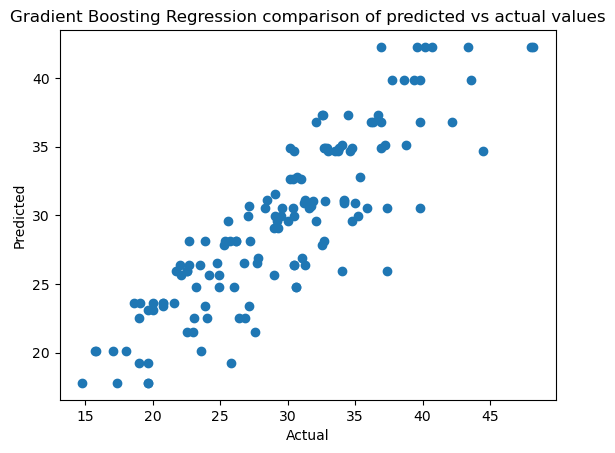

In [33]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Gradient Boosting Regression comparison of predicted vs actual values")
plt.show()

In [34]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

Gradient_Boosting_results=[R2, rmse]

models_values.append(Gradient_Boosting_results)

print (R2, rmse)

0.7516457579952888 3.472506027159024


# 7.) Linear Support Vector Regression

In [35]:
data = preprocess.dummied_standardized('explored_data_v1.csv')

grid_params = {'C':[.001,.01,.1],'tol':[.00001,.001, 1],'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],'max_iter':[1000,1500,2000,3000,5000]}

gscv_svr = GridSearchCV(LinearSVR(), param_grid=grid_params, cv=5, scoring='r2' )

svr = gscv_svr.fit(data[0],data[2])

print (svr.best_params_)
print (svr.best_score_)

{'C': 0.1, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1000, 'tol': 0.001}
0.7107073600673643


In [36]:
svr.score(data[1],data[3])

0.8003616877154075

In [37]:
y_pred = svr.predict(data[1])

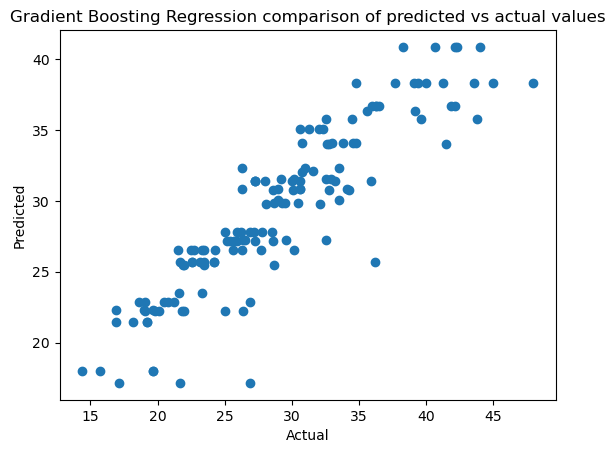

In [38]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Gradient Boosting Regression comparison of predicted vs actual values")
plt.show()

In [39]:
y_true = data[3]

sum_squares_residuals = sum((y_true - y_pred) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

SVM_results=[R2, rmse]

models_values.append(SVM_results)

print (R2, rmse)

0.8003616877154074 3.183578945403586


# 8.) Deep Neural Network

In [40]:
data = preprocess.dummied('explored_data_v1.csv')
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(data[0]))


In [41]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (556, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [42]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
    loss='mean_absolute_error')

In [43]:
history = model.fit(
    data[0],
    data[2],
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
195,2.472442,2.741116,195
196,2.507886,2.883732,196
197,2.644567,2.731130,197
198,2.560664,2.921179,198
199,2.535722,3.110453,199


In [45]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.grid(True)

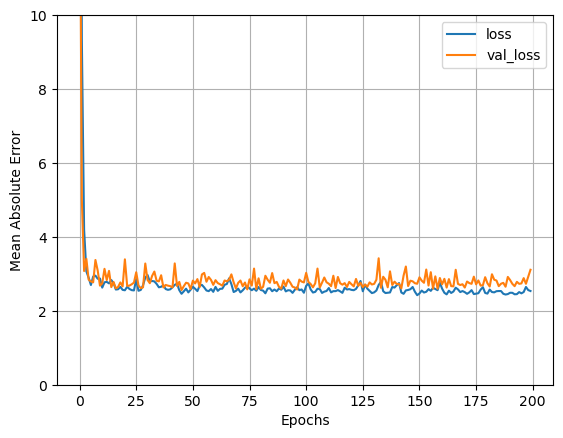

In [46]:
show = plot_loss(history)

In [47]:
test_results = {}

test_results['model'] = model.evaluate(
    data[1],
    data[3], verbose=0)

In [48]:
test_results

{'model': 2.8543646335601807}

In [49]:
y_pred = model.predict(data[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


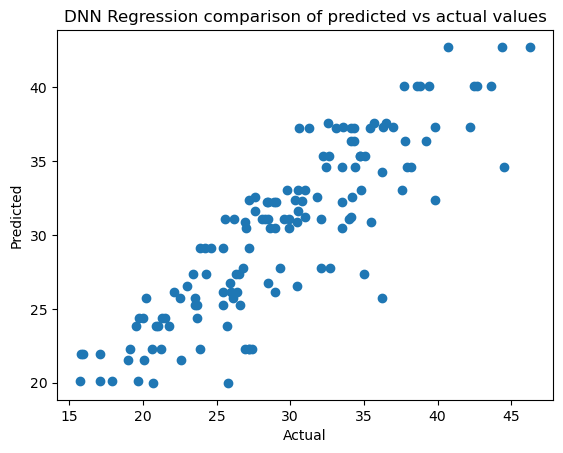

In [50]:
plt.scatter(data[3], y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("DNN Regression comparison of predicted vs actual values")
plt.show()

In [51]:
y_true = data[3]

In [52]:
sum_squares_residuals = sum((np.array(y_true).reshape(-1,1) - np.array(y_pred).reshape(-1,1)) ** 2)
sum_squares = sum((y_true - np.mean(y_true)) ** 2)
R2 = 1 - sum_squares_residuals / sum_squares

r2_var = 0
for x in R2:
    r2_var = float(x)

rmse = (mean_squared_error(y_true, y_pred))**(1/2)

DNN_results=[r2_var, rmse]

models_values.append(DNN_results)

print (r2_var, rmse)

0.7437463749779702 3.425688370164526


## Comparing Models

In [53]:
print (models_keys)

['Ordinary_Least_Squares', 'Ridge', 'Lasso', 'Random_Forest', 'K_Neighbors', 'Gradient_Boosting', 'Support_Vector_Machine', 'Deep_Neural_Network']


In [54]:
print(models_values)

[[0.07267146928491486, 6.034206296231276], [0.7618651097541416, 3.4324338433345303], [0.7292131359039775, 3.4084677660601663], [0.7048639543370024, 3.382501886699642], [0.779771876833948, 2.986030647554204], [0.7516457579952888, 3.472506027159024], [0.8003616877154074, 3.183578945403586], [0.7437463749779702, 3.425688370164526]]


In [55]:
for x in range(len(models_keys)):
    
    best_model_results[models_keys[x]] = models_values[x]

In [56]:
print(best_model_results)

{'Ordinary_Least_Squares': [0.07267146928491486, 6.034206296231276], 'Ridge': [0.7618651097541416, 3.4324338433345303], 'Lasso': [0.7292131359039775, 3.4084677660601663], 'Random_Forest': [0.7048639543370024, 3.382501886699642], 'K_Neighbors': [0.779771876833948, 2.986030647554204], 'Gradient_Boosting': [0.7516457579952888, 3.472506027159024], 'Support_Vector_Machine': [0.8003616877154074, 3.183578945403586], 'Deep_Neural_Network': [0.7437463749779702, 3.425688370164526]}


In [57]:
results_df = pd.DataFrame(data=best_model_results)

In [58]:
results_df = results_df.T

In [59]:
results_df = results_df.rename(columns={0:'R_Squared',1:'Root_Mean_Squared_Error'})

In [60]:
results_df.head(8)

,R_Squared,Root_Mean_Squared_Error
Ordinary_Least_Squares,0.072671,6.034206
Ridge,0.761865,3.432434
Lasso,0.729213,3.408468
Random_Forest,0.704864,3.382502
K_Neighbors,0.779772,2.986031
Gradient_Boosting,0.751646,3.472506
Support_Vector_Machine,0.800362,3.183579
Deep_Neural_Network,0.743746,3.425688


In [61]:
results_df.to_csv('test_results.csv')

For the sake of cleanliness: use Ridge, Lasso, and Random Forest in the actual prediction generation and compare results

# Model Execution:
Run through a list of inputs to see how different demographics would be impacted based on their demographic and the unemployment rate change, and employment amount change

In [62]:
df=pd.read_csv('explored_data_v1.csv')

In [63]:
df.head()

,Unnamed: 0,Indicator,Subgroup,Date,Value,Year,weighted_unemployment_rate_change,total_unemployed_change
0,0,Symptoms of Depressive Disorder,Hispanic or Latino,2020-04-23,29.4,2020,6.168662,1771000.0
1,1,Symptoms of Anxiety Disorder,Hispanic or Latino,2020-04-23,36.3,2020,6.168662,1771000.0
2,2,Symptoms of Anxiety Disorder or Depressive Dis...,Hispanic or Latino,2020-04-23,42.7,2020,6.168662,1771000.0
3,3,Symptoms of Depressive Disorder,Hispanic or Latino,2020-05-07,27.9,2020,6.168662,1771000.0
4,4,Symptoms of Anxiety Disorder,Hispanic or Latino,2020-05-07,36.2,2020,6.168662,1771000.0


In [64]:
races= list(df['Subgroup'].unique())

In [65]:
indicators = list(df['Indicator'].unique())

In [66]:
employment_rate_changes = list(range(-10, 12, 2))
employment_change = list(range(-2000000, 2400000, 400000))

In [75]:
rng = np.random.default_rng()
        
rand_race = list(rng.integers(low=0, high=4, size=9))
rand_indic = list(rng.integers(low=0, high=3, size=9))
rand_econ = list(rng.integers(low=0, high=11, size=9))

In [76]:
model_inputs = [[rand_race[x],rand_indic[x],rand_econ[x]] for x in range(0,9)]

In [77]:
print (model_inputs)

[[2, 1, 4], [2, 1, 8], [3, 2, 10], [0, 2, 7], [1, 0, 4], [1, 0, 9], [0, 0, 0], [3, 1, 4], [1, 1, 8]]


In [78]:
print (model_inputs[0][2])

4


In [79]:
def mental_health_toll(inputs, df_path, verbose):
    
    verbose = verbose
    #instantiate results dictionary
    
    tab_results = pd.DataFrame()
    
    round_results = []
    for x in inputs:
        
        #create the ready data to retrain the models within the function
        def dummied_standardized(df_path):

            df = pd.read_csv(df_path)

            df = df.drop(columns='Unnamed: 0')

            df = df.drop(columns=['Date','Year'])

            dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        

            dummed_df = pd.concat([df, dum_df],axis=1)

            dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])

            features = list(dummed_df.columns[dummed_df.columns != 'Value'])

            X = dummed_df[features]

            y = dummed_df['Value']

            s_scaler = preprocessing.StandardScaler().fit(X)

            X=s_scaler.transform(X)

            return X , y



        def dummied(df_path):

            df = pd.read_csv(df_path)

            df = df.drop(columns='Unnamed: 0')

            df = df.drop(columns=['Date','Year'])

            dum_df = pd.get_dummies(df[['Indicator','Subgroup']])        

            dummed_df = pd.concat([df, dum_df],axis=1)

            dummed_df = dummed_df.drop(columns=['Indicator','Subgroup'])

            features = list(dummed_df.columns[dummed_df.columns != 'Value'])

            X = dummed_df[features]

            y = dummed_df['Value']

            return X, y


        round_results = []

        #transform the inputs into version of X

        def input_conversion(x, df_path):
            
            #reaccess x values in whole set to get the fit correct

            df_again = pd.read_csv(df_path)

            df_again = df_again.drop(columns='Unnamed: 0')

            df_again = df_again.drop(columns=['Date','Year'])

            ddf = pd.get_dummies(df_again[['Indicator','Subgroup']])        

            dddf = pd.concat([df_again, ddf],axis=1)

            dddf = dddf.drop(columns=['Indicator','Subgroup'])

            features = list(dddf.columns[dddf.columns != 'Value'])
            
            final_features = list(dddf.columns)

            X = dddf[features]

            y = dddf['Value']

            #make input generation
        
            df = pd.read_csv(df_path)

            df = df.drop(columns='Unnamed: 0')

            df = df.drop(columns=['Date','Year'])
            
            columns = list(df.columns[df.columns != 'Value'])
            
        
            races= list(df['Subgroup'].unique())
            
            indicators = list(df['Indicator'].unique())
            
            employment_rate_changes = list(range(-10, 12, 2))
            
            employment_change = list(range(-2000000, 2400000, 400000))
            
            in_df = pd.DataFrame(data={columns[0]:indicators[x[1]], columns[1]:races[x[0]], columns[2]:employment_rate_changes[x[2]], columns[3]:employment_change[x[2]]}, index=[0])
            
            dum_in = pd.get_dummies(in_df[['Indicator','Subgroup']])        

            dum_in = pd.concat([in_df, dum_in],axis=1)

            dum_in = dum_in.drop(columns=['Indicator','Subgroup'])
            
            features_columns = list(dum_in.columns)
            
            absent_feat = [x for x in features if x not in features_columns]
            
            merge_falses = {}
            for x in absent_feat:
                merge_falses[x] = False
                
            falses = pd.DataFrame(data=merge_falses, index=[0])
            
            dum_in = pd.concat([dum_in, falses], axis=1)
            
            X_input_dummed = dum_in[features]
    
            s_scaler = preprocessing.StandardScaler().fit(X)

            X_input_scaled = s_scaler.transform(X_input_dummed)
            
            return X_input_dummed, X_input_scaled
        

            
        # give code for the model fitting with all data

        #1.) Ridge
        r_data = dummied_standardized(df_path)
        r_model = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=6, scoring='r2').fit(r_data[0], r_data[1])
        r_y_pred =r_model.predict(r_data[0])
        r_y_true = r_data[1]
        r_rmse = (mean_squared_error(r_y_true, r_y_pred))**(1/2)
        
        #print (r_data[0], (input_conversion(x, df_path)[1]))
        
        ridge_prediction = r_model.predict(input_conversion(x, df_path)[1])
        
        ridge_tabular = [ridge_prediction, r_rmse]
        
        ridge_results = f'Ridge predicts a mental health score of {ridge_prediction} with a root mean squared error of {r_rmse}'
        
        round_results.append(ridge_results)
        
        #2.) Lasso
        
        l_data = dummied_standardized(df_path)
        
        l_model = LassoCV(alphas=[.001, .01, .1, 1,10],max_iter = 1500, cv=5).fit(l_data[0], l_data[1])
        l_y_pred =l_model.predict(l_data[0])
        
        l_y_true = l_data[1]

        l_rmse = (mean_squared_error(l_y_true, l_y_pred))**(1/2)
        
        lasso_prediction = l_model.predict(input_conversion(x, df_path)[1])
        
        lasso_tabular = [lasso_prediction, l_rmse]
        
        lasso_results = f'Lasso predicts a mental health score of {lasso_prediction} with a root mean squared error of {l_rmse}'
        
        round_results.append(lasso_results)
        
        #3.) Random Forest 
    
        rf_data = dummied(df_path)

        grid_params = {'n_estimators':[50, 75, 100, 125, 150, 200], 'criterion':['friedman_mse','squared_error'] }

        gscv_rf = GridSearchCV(RandomForestRegressor(), param_grid=grid_params, cv=5, scoring='r2')

        rf_model = gscv_rf.fit(rf_data[0],rf_data[1])
        
        rf_y_pred =rf_model.predict(rf_data[0])
        
        rf_y_true = rf_data[1]

        rf_rmse = (mean_squared_error(rf_y_true, rf_y_pred))**(1/2)
        
        rf_prediction = rf_model.predict(input_conversion(x, df_path)[0])
        
        rf_tabular = [rf_prediction, rf_rmse]
        
        rf_results = f'Random Forest predicts a mental health score of {rf_prediction} with a root mean squared error of {rf_rmse}'
        
        round_results.append(rf_results)
        
        if verbose==True:
            print (f'predicting the mental health of this group: {races[x[0]]}, in an economic situation with the following unemployment rate change and unemployment change: {employment_rate_changes[x[2]], employment_change[x[2]]}')
            print (ridge_results)
            print (lasso_results)
            print (rf_results)
        
        column_label = f'{races[x[0]],employment_rate_changes[x[2]], employment_change[x[2]]}'
        tabs = [lasso_tabular, ridge_tabular, rf_tabular]
        data = {'input':column_label,'ridge_pred':tabs[1][0], 'ridge_rmse':tabs[1][1], 'lasso_pred':tabs[0][0], 'lasso_rmse':tabs[0][1], 'random_forest_pred': tabs[2][0],'random_forest_rmse': tabs[2][1]}
               
        tab_results = pd.concat([tab_results, pd.DataFrame(data)], axis=0)
        
        
        
    
    return tab_results
    

In [80]:
final = mental_health_toll(model_inputs, 'explored_data_v1.csv', True)

predicting the mental health of this group: Non-Hispanic Black, single race, in an economic situation with the following unemployment rate change and unemployment change: (-2, -400000)
Ridge predicts a mental health score of [30.51610332] with a root mean squared error of 3.3508111618941094
Lasso predicts a mental health score of [30.50641028] with a root mean squared error of 3.350900702836426
Random Forest predicts a mental health score of [28.76522998] with a root mean squared error of 3.150573603518668
predicting the mental health of this group: Non-Hispanic Black, single race, in an economic situation with the following unemployment rate change and unemployment change: (6, 1200000)
Ridge predicts a mental health score of [34.77933684] with a root mean squared error of 3.3508111618941094
Lasso predicts a mental health score of [34.74467569] with a root mean squared error of 3.350900702836426
Random Forest predicts a mental health score of [34.78630896] with a root mean squared erro

In [81]:
final = final.set_index('input')

In [84]:
final.head(9)

,ridge_pred,ridge_rmse,lasso_pred,lasso_rmse,random_forest_pred,random_forest_rmse
input,,,,,,
"('Non-Hispanic Black, single race', -2, -400000)",30.516103,3.350811,30.506410,3.350901,28.765230,3.150574
"('Non-Hispanic Black, single race', 6, 1200000)",34.779337,3.350811,34.744676,3.350901,34.786309,3.151277
"('Non-Hispanic Asian, single race', 10, 2000000)",33.153172,3.350811,33.126719,3.350901,32.566949,3.151361
"('Hispanic or Latino', 4, 800000)",40.256746,3.350811,40.213854,3.350901,34.600973,3.151613
"('Non-Hispanic White, single race', -2, -400000)",23.021682,3.350811,23.058787,3.350901,24.094638,3.151390
"('Non-Hispanic White, single race', 8, 1600000)",28.350724,3.350811,28.356619,3.350901,29.230060,3.151046
"('Hispanic or Latino', -10, -2000000)",24.072820,3.350811,24.101876,3.350901,25.915288,3.151700
"('Non-Hispanic Asian, single race', -2, -400000)",22.340653,3.350811,22.365746,3.350901,20.473543,3.150660
"('Non-Hispanic White, single race', 6, 1200000)",31.590515,3.350811,31.588492,3.350901,36.212652,3.151045


In [83]:
final.to_csv('prediction.csv')

# Summary:

In this modeling step I performed regression with the following methods: OLS regression, Ridge Regression, Lasso Regression, Random Forest Regression, K Neigbors Regression, and Deep Neural Network regression model as well.

Throughout the notebook testing, I found that the Ridge, Lasso, and Random Forest Regression performed the best consistently on the test data, and because of this these models were used in the final prediction function: mental health toll.  Ridge and Lasso, because they use dimension reduction, were probably very effective at producing a regression line that decreased weights optimally for the useless features.  And the random forest regression uses a bagging ensemble tactic, where many estimators are averaged together to construct a decision tree for the regression; the averageness most likely helped the model perform relativlely well.

All things said, all of the models besides the ordinary least squares alogrithm were close in R squared and root mean squared values to each other.  Since the results were so close across the board, and no machine learning models was able to crack into .9 R squared value, there might be an indication that there is a lack of data for this specific question.  

Most likely information on mental health during other economic/health crises would be quite useful in strengthening this model, perhaps that would be enough to increase performance.

According to the predictions:

Hispanic and Black predictions seem to be the most influenced by the employment rate change (positive numbers indicated an increase in unemployment rate) as seen in the model with score variations from 40s to 20s (40s would indicate most likely serious anxiet and depression, 30s would indicate either serious anxiety or depression, with the other being mild, and 20s is closer to average score with acute stress ongoing in the person's life).  White scores are pretty close to high 20s and low 30s despite the big changes, and the Asian scores are usually around low 20s.

